# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Untuk clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("C:\\Users\\Leviathans\\Downloads\\submiss\\car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### *1. Memahami Struktur Dataset*

In [3]:
# Menampilkan jumlah baris dan kolom dalam dataset
print("Jumlah baris dan kolom dalam dataset:", df.shape)

# Menampilkan informasi tipe data dari setiap kolom
print("\nInformasi tipe data setiap kolom:")
print(df.info())

Jumlah baris dan kolom dalam dataset: (558837, 16)

Informasi tipe data setiap kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: flo

In [4]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [5]:
df.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

**Note:**
- Terdapat 558837 ribu baris dan 16 kolom dataset
  - 0   year          558837 non-null  int64  
  - 1   make          548536 non-null  object
  - 2   model         548438 non-null  object
  - 3   trim          548186 non-null  object
  - 4   body          545642 non-null  object
  - 5   transmission  493485 non-null  object
  - 6   vin           558833 non-null  object
  - 7   state         558837 non-null  object
  - 8   condition     547017 non-null  float64
  - 9   odometer      558743 non-null  float64
  - 10  color         558088 non-null  object
  - 11  interior      558088 non-null  object
  - 12  seller        558837 non-null  object
  - 13  mmr           558799 non-null  float64
  - 14  sellingprice  558825 non-null  float64
  - 15  saledate      558825 non-null  object

### *2. Menangani Data yang Hilang*



In [6]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [7]:
df.duplicated().sum()

0

*Note:*
- Ada terdapat beberapa missing value yang perlu dihapus karena akan mengganggu
- Tapi tidak ada duplikasi

### *3. Analisis Distribusi dan Korelasi*

In [8]:
#Analisis Distribusi Variabel Numerik
print("Statistik deskriptif:")
print(df.describe())

Statistik deskriptif:
                year      condition       odometer            mmr  \
count  558837.000000  547017.000000  558743.000000  558799.000000   
mean     2010.038927      30.672365   68320.017767   13769.377495   
std         3.966864      13.402832   53398.542821    9679.967174   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000      23.000000   28371.000000    7100.000000   
50%      2012.000000      35.000000   52254.000000   12250.000000   
75%      2013.000000      42.000000   99109.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  558825.000000  
mean    13611.358810  
std      9749.501628  
min         1.000000  
25%      6900.000000  
50%     12100.000000  
75%     18200.000000  
max    230000.000000  


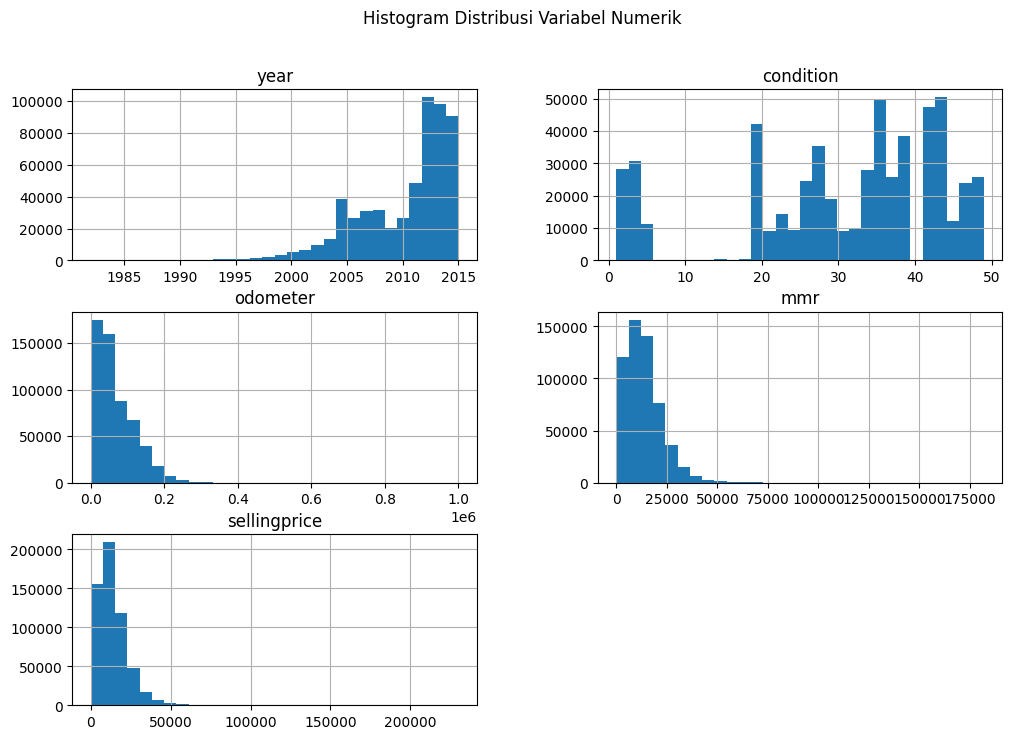

<Figure size 1200x600 with 0 Axes>

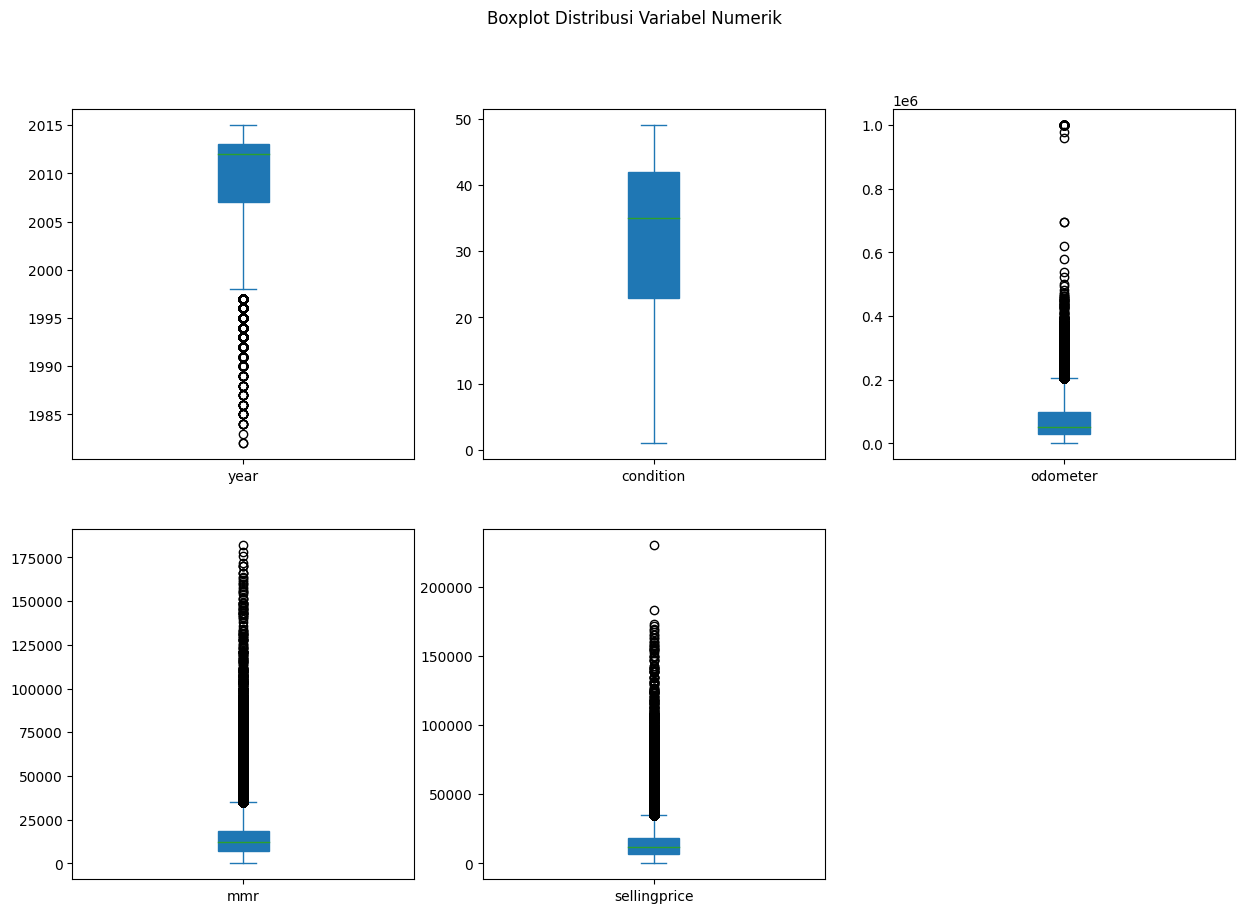

In [9]:
# Histogram untuk variabel numerik
numerical_cols = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

df[numerical_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Histogram Distribusi Variabel Numerik")
plt.show()

# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(12, 6))
df[numerical_cols].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10), patch_artist=True)
plt.suptitle("Boxplot Distribusi Variabel Numerik")
plt.show()

### *4. Visualisasi Data*

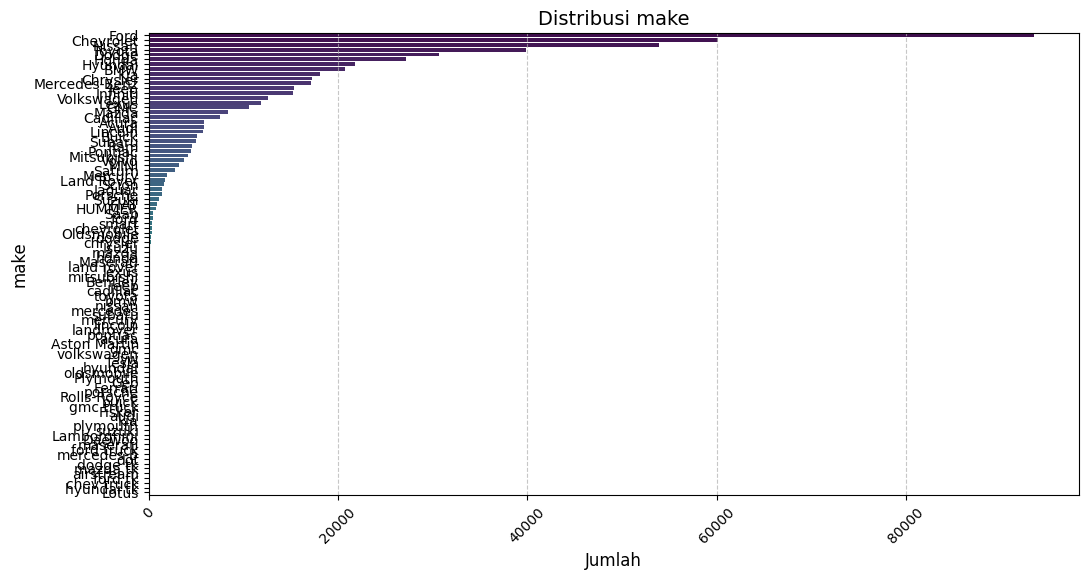

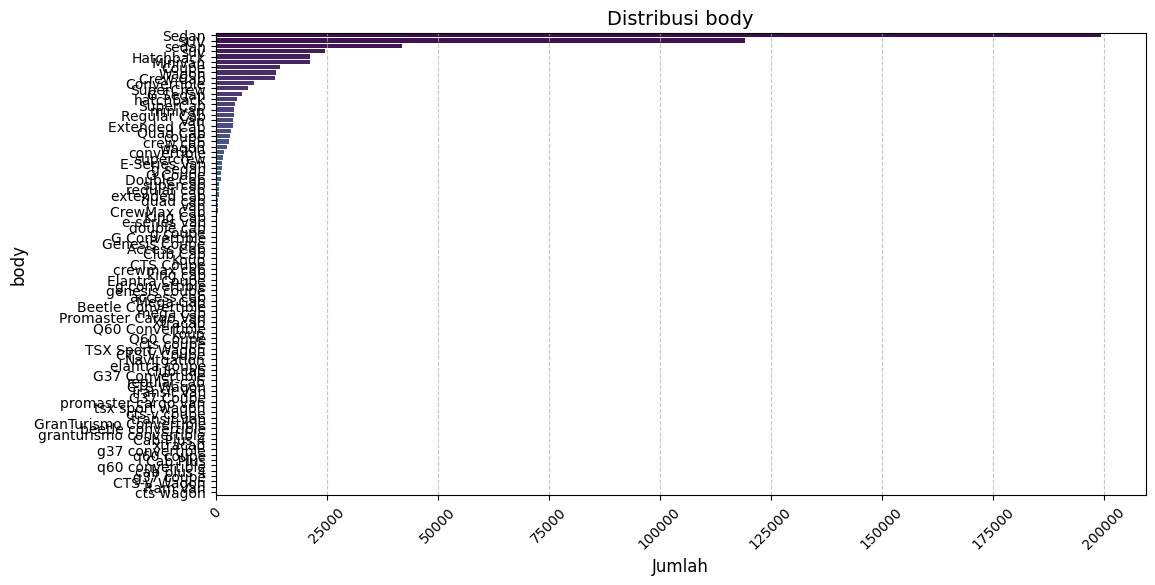

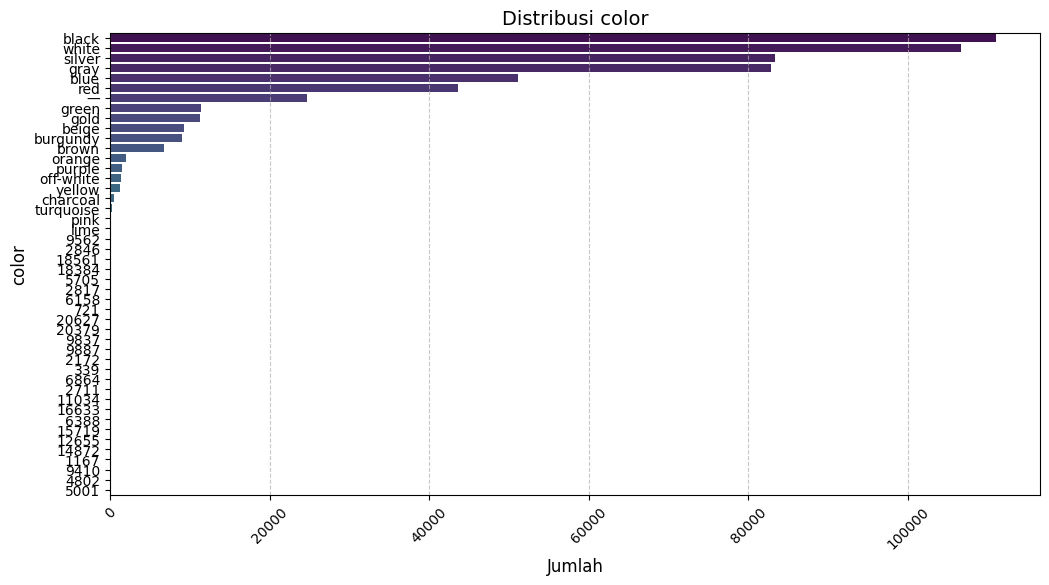

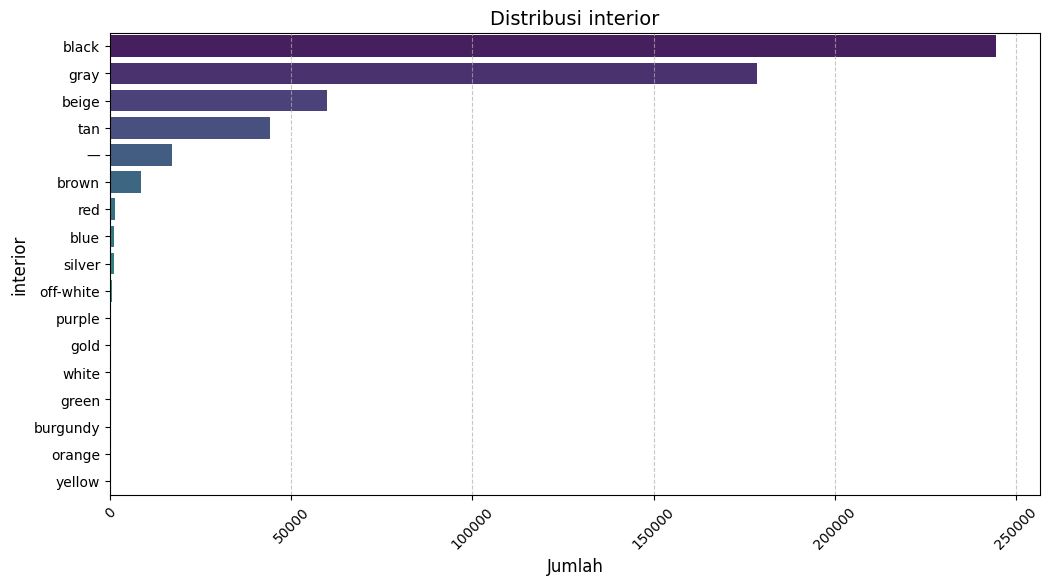

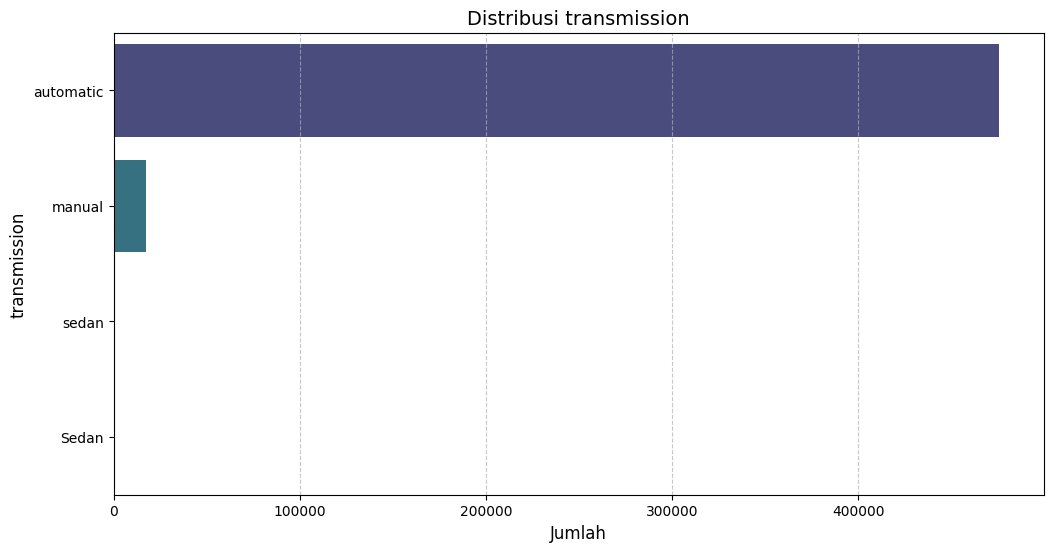

In [10]:
categorical_cols = ['make', 'body', 'color', 'interior', 'transmission']

# Visualisasi setiap kategori dalam diagram batang
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    
    # Mengurutkan berdasarkan jumlah kemunculan kategori
    category_counts = df[col].value_counts()

    sns.barplot(x=category_counts.values, y=category_counts.index, hue=category_counts.index, palette="viridis", legend=False)

    plt.title(f"Distribusi {col}", fontsize=14)
    plt.xlabel("Jumlah", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Rotasi label jika terlalu banyak kategori
    if len(category_counts) > 10:
        plt.xticks(rotation=45)

    plt.show()

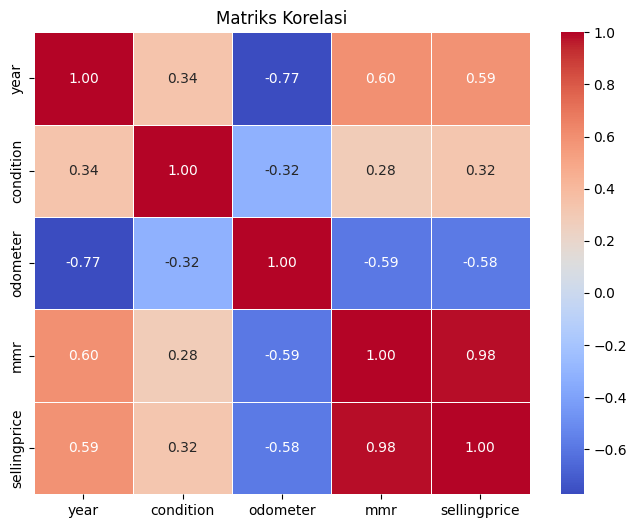

In [11]:
# Variabel numerik untuk korelasi
numerical_cols = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

# Plot Heatmap Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

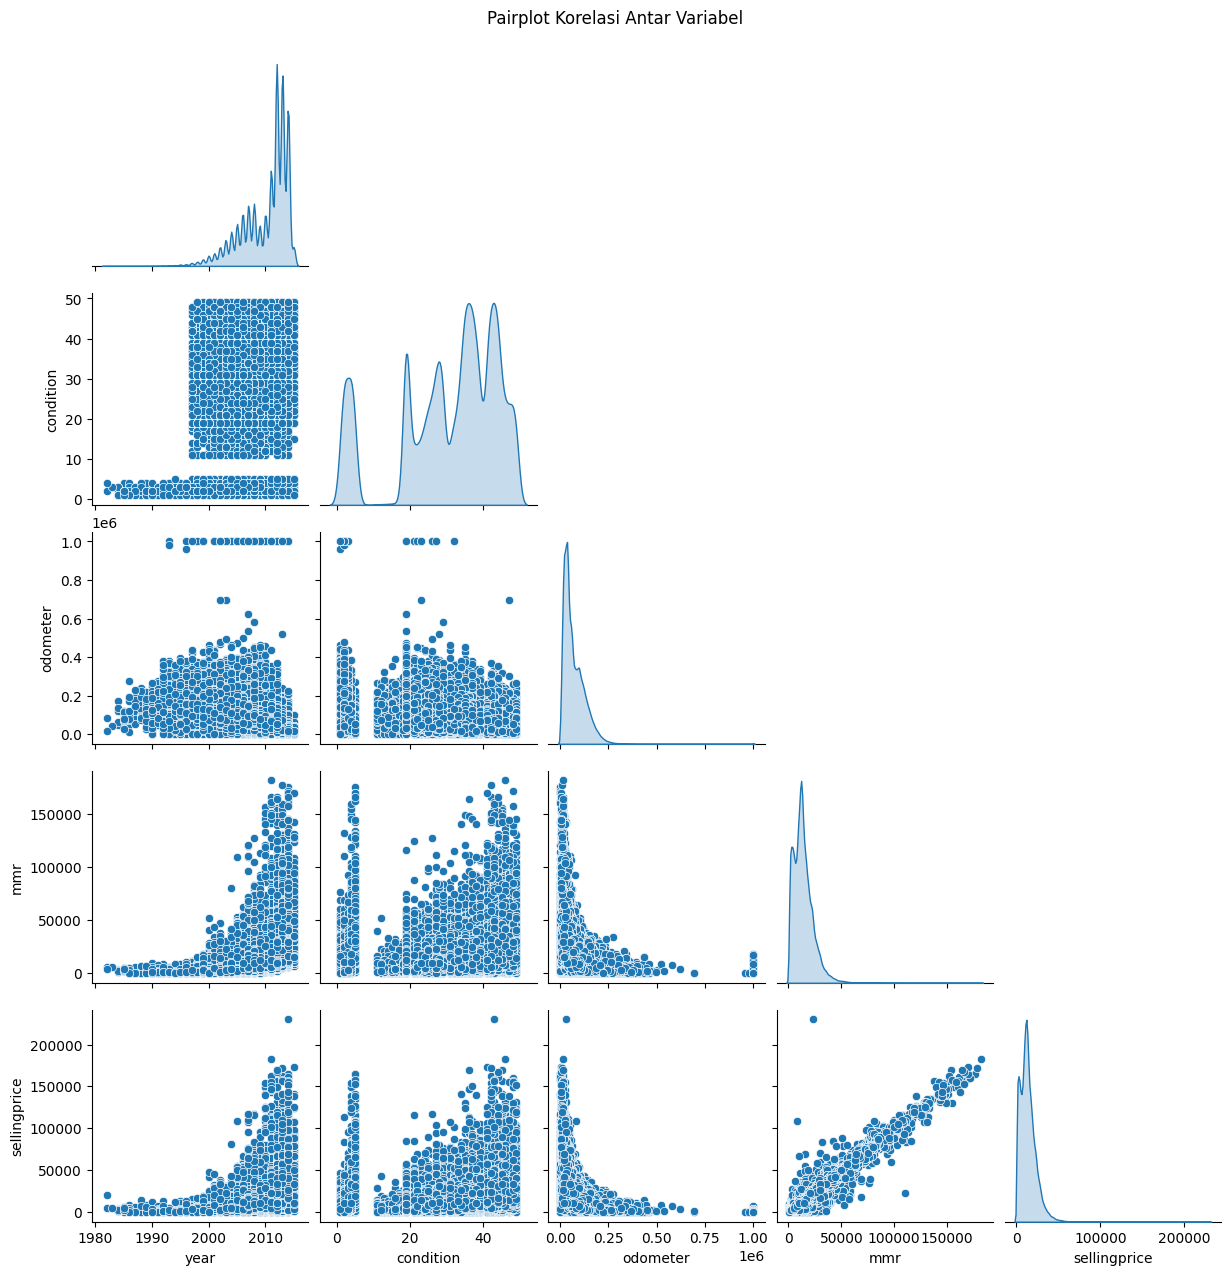

In [12]:
# Scatter plot untuk melihat hubungan antar variabel numerik
sns.pairplot(df[numerical_cols], diag_kind="kde", corner=True)
plt.suptitle("Pairplot Korelasi Antar Variabel", y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

#### *1. Menghapus atau Menangani Data Kosong (Missing Values)*

In [13]:
#menghapus missing value
df.dropna(inplace = True)

In [14]:
df.drop('vin', axis=1, inplace=True)

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   state         472325 non-null  object 
 7   condition     472325 non-null  float64
 8   odometer      472325 non-null  float64
 9   color         472325 non-null  object 
 10  interior      472325 non-null  object 
 11  seller        472325 non-null  object 
 12  mmr           472325 non-null  float64
 13  sellingprice  472325 non-null  float64
 14  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 57.7+ MB
None


*Note:*
- Beberapa column di hapus karena tidak memiliki korelasi yang signifikan

#### *2. Penggabungan Data*

In [16]:
# menggabungkan column mmr dan sellingprice menjadi vahiclevalue
df['vehiclevalue'] = (df['sellingprice'] + df['mmr'])/2
df.drop(columns=['mmr', 'sellingprice'], inplace=True)

#### *3. Deteksi dan menangani Outliner*

In [17]:
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    return outliers

outliers = detect_outliers_iqr(df, ['year', 'condition', 'odometer', 'vehiclevalue'])
print(outliers)

{'year': 9799, 'condition': 0, 'odometer': 9029, 'vehiclevalue': 14133}


##### *Note*
- Outliner tidak di hapus karena memiliki peran penting dalam distribusi data
- jika di hapus akan menghilangkan informasi penting

#### *4. Pemisahan data*

In [18]:
print(df['saledate'].dropna().unique()[:10])  # Menampilkan 10 nilai unik pertama

['Tue Dec 16 2014 12:30:00 GMT-0800 (PST)'
 'Thu Jan 15 2015 04:30:00 GMT-0800 (PST)'
 'Thu Jan 29 2015 04:30:00 GMT-0800 (PST)'
 'Thu Dec 18 2014 12:30:00 GMT-0800 (PST)'
 'Tue Dec 30 2014 12:00:00 GMT-0800 (PST)'
 'Wed Dec 17 2014 12:30:00 GMT-0800 (PST)'
 'Tue Dec 16 2014 13:00:00 GMT-0800 (PST)'
 'Thu Dec 18 2014 12:00:00 GMT-0800 (PST)'
 'Tue Jan 20 2015 04:00:00 GMT-0800 (PST)'
 'Tue Dec 16 2014 12:00:00 GMT-0800 (PST)']


In [19]:
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)  # Konversi ke UTC
df['saledate'] = df['saledate'].dt.tz_convert(None)  # Hilangkan informasi zona waktu

C:\Users\Leviathans\AppData\Local\Temp\ipykernel_25340\3004804908.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], utc=True)  # Konversi ke UTC


In [20]:
df['sale_year'] = df['saledate'].dt.year
df['sale_month'] = df['saledate'].dt.month
df['sale_day'] = df['saledate'].dt.day
df['sale_dayofweek'] = df['saledate'].dt.dayofweek
df['sale_hour'] = df['saledate'].dt.hour
df['sale_is_weekend'] = df['sale_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# Drop original 'saledate'
df.drop(columns=['saledate'], inplace=True)

#### *5. Normalisasi atau standarisasi fitur*

In [21]:
# Buat objek scaler
scaler = MinMaxScaler()

# Daftar kolom yang akan dinormalisasi
scaled_cols = ['year', 'condition', 'odometer', 'vehiclevalue', 
               'sale_year', 'sale_month', 'sale_day', 'sale_hour', 'sale_dayofweek', 'sale_is_weekend']

# Lakukan normalisasi
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [22]:
print(df.head())

   year   make                model        trim   body transmission state  \
0  1.00    Kia              Sorento          LX    SUV    automatic    ca   
1  1.00    Kia              Sorento          LX    SUV    automatic    ca   
2  0.96    BMW             3 Series  328i SULEV  Sedan    automatic    ca   
3  1.00  Volvo                  S60          T5  Sedan    automatic    ca   
4  0.96    BMW  6 Series Gran Coupe        650i  Sedan    automatic    ca   

   condition  odometer  color interior  \
0   0.083333  0.016638  white    black   
1   0.083333  0.009392  white    beige   
2   0.916667  0.001330   gray    black   
3   0.833333  0.014281  white    black   
4   0.875000  0.002640   gray    black   

                                   seller  vehiclevalue  sale_year  \
0                 kia motors america  inc      0.114705        0.0   
1                 kia motors america  inc      0.115527        0.0   
2  financial services remarketing (lease)      0.169248        1.0   
3   

In [23]:
print(df[['year', 'condition', 'odometer', 'vehiclevalue', 'sale_year', 'sale_month', 'sale_day', 'sale_dayofweek']].describe())

                year      condition       odometer   vehiclevalue  \
count  472325.000000  472325.000000  472325.000000  472325.000000   
mean        0.808439       0.620295       0.066701       0.075038   
std         0.152886       0.276810       0.051940       0.052257   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.720000       0.479167       0.028136       0.039811   
50%         0.880000       0.708333       0.051084       0.066877   
75%         0.920000       0.833333       0.096589       0.099493   
max         1.000000       1.000000       1.000000       1.000000   

           sale_year     sale_month       sale_day  sale_dayofweek  
count  472325.000000  472325.000000  472325.000000   472325.000000  
mean        0.922111       0.238154       0.450309        0.228467  
std         0.267997       0.276517       0.289209        0.200167  
min         0.000000       0.000000       0.000000        0.000000  
25%         1.000000       0.0000

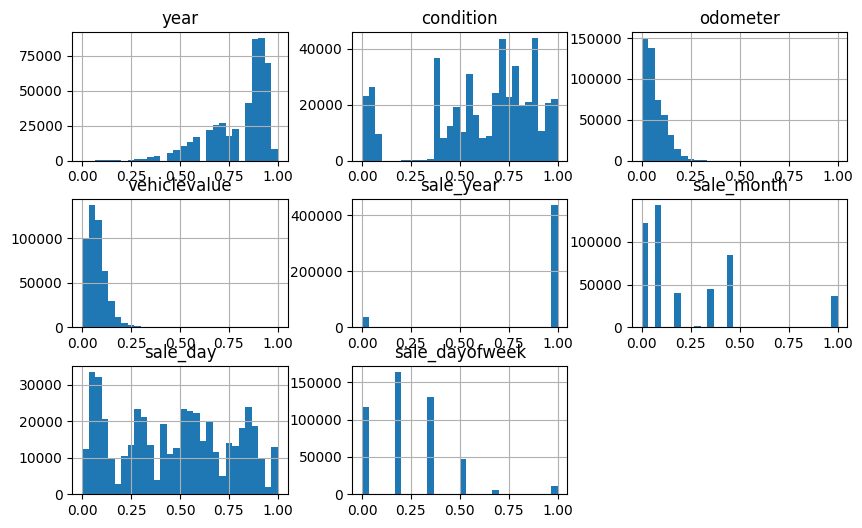

In [24]:
df[['year', 'condition', 'odometer', 'vehiclevalue', 'sale_year', 'sale_month', 'sale_day', 'sale_dayofweek']].hist(figsize=(10, 6), bins=30)
plt.show()

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             472325 non-null  float64
 1   make             472325 non-null  object 
 2   model            472325 non-null  object 
 3   trim             472325 non-null  object 
 4   body             472325 non-null  object 
 5   transmission     472325 non-null  object 
 6   state            472325 non-null  object 
 7   condition        472325 non-null  float64
 8   odometer         472325 non-null  float64
 9   color            472325 non-null  object 
 10  interior         472325 non-null  object 
 11  seller           472325 non-null  object 
 12  vehiclevalue     472325 non-null  float64
 13  sale_year        472325 non-null  float64
 14  sale_month       472325 non-null  float64
 15  sale_day         472325 non-null  float64
 16  sale_dayofweek   472325 non-null  float64
 

#### *6. Encoding Data Kategorikal*

In [26]:
categorical_cols = ['transmission', 'color', 'state', 'make', 'body', 'model', 'trim', 'interior', 'seller']
# salinan dataframe
df_encoded = df.copy()
label_encoders = {}

# Loop untuk mengubah setiap kolom kategorikal menjadi angka
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  # Konversi ke string untuk menghindari error NaN
    label_encoders[col] = le  # Simpan encoder 

df_encoded.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,vehiclevalue,sale_year,sale_month,sale_day,sale_dayofweek,sale_hour,sale_is_weekend
0,1.00,24,637,818,35,0,2,0.083333,0.016638,17,1,5943,0.114705,0.0,1.0,0.500000,0.166667,0.173913,0.0
1,1.00,24,637,818,35,0,2,0.083333,0.009392,17,0,5943,0.115527,0.0,1.0,0.500000,0.166667,0.173913,0.0
2,0.96,3,8,253,36,0,2,0.916667,0.001330,7,1,4090,0.169248,1.0,0.0,0.433333,0.333333,0.869565,0.0
3,1.00,51,575,1212,36,0,2,0.833333,0.014281,17,1,11541,0.151021,1.0,0.0,0.900000,0.333333,0.869565,0.0
4,0.96,3,33,335,36,0,2,0.875000,0.002640,7,1,4090,0.364122,0.0,1.0,0.566667,0.500000,0.173913,0.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

#### *1. Pilih algoritma clustering yang sesuai.*

##### *Note:*
- Algoritma yang digunakan adalah algoritma K-MEAN

#### *2. Latih model dengan data menggunakan algoritma tersebut.*

In [27]:
numerical_features = df_encoded.select_dtypes(include=['number']).columns

# DataFrame untuk menyimpan hasil clustering
df_clusters = pd.DataFrame(index=df_encoded.index)

# K-Means Clustering untuk k=2 sampai k=10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_encoded[numerical_features])  # Melatih model
    
    # Menyimpan hasil clustering
    df_clusters[f'cluster_k{k}'] = kmeans.labels_

# Menampilkan hasil clustering
print(df_clusters.head())

   cluster_k2  cluster_k3  cluster_k4  cluster_k5  cluster_k6  cluster_k7  \
0           1           1           3           0           4           4   
1           1           1           3           0           4           4   
2           1           1           1           4           1           3   
3           0           0           0           1           0           2   
4           1           1           1           4           1           3   

   cluster_k8  cluster_k9  cluster_k10  
0           2           5            2  
1           2           5            2  
2           6           0            4  
3           4           4            0  
4           6           0            4  


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

#### *1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.*

[1480002170206.0835]
[1480002170206.0835, 779286355058.5537]
[1480002170206.0835, 779286355058.5537, 387122389280.0532]
[1480002170206.0835, 779286355058.5537, 387122389280.0532, 291291690949.86633]
[1480002170206.0835, 779286355058.5537, 387122389280.0532, 291291690949.86633, 231973043668.9195]
[1480002170206.0835, 779286355058.5537, 387122389280.0532, 291291690949.86633, 231973043668.9195, 181982463679.89386]
[1480002170206.0835, 779286355058.5537, 387122389280.0532, 291291690949.86633, 231973043668.9195, 181982463679.89386, 163794413491.84726]
[1480002170206.0835, 779286355058.5537, 387122389280.0532, 291291690949.86633, 231973043668.9195, 181982463679.89386, 163794413491.84726, 148150765621.10815]
[1480002170206.0835, 779286355058.5537, 387122389280.0532, 291291690949.86633, 231973043668.9195, 181982463679.89386, 163794413491.84726, 148150765621.10815, 134809643629.18481]


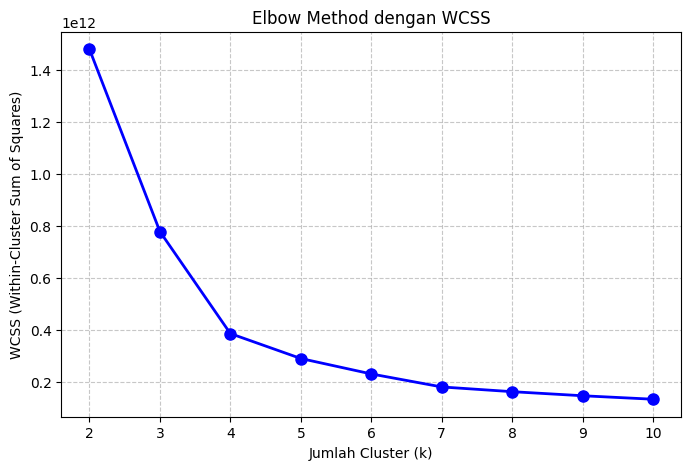

In [28]:
# Menggunakan model yang sudah dilatih (dari df_clusters)
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_encoded[numerical_features])
    wcss.append(kmeans.inertia_)  # Simpan nilai WCSS
    print(wcss)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method dengan WCSS')
plt.xticks(K_range)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#### *2. Hitung Silhouette Score sebagai ukuran kualitas cluster.*

Silhouette Score untuk k=2: 0.6165
Silhouette Score untuk k=3: 0.5503
Silhouette Score untuk k=4: 0.5610
Silhouette Score untuk k=5: 0.5101
Silhouette Score untuk k=6: 0.4870
Silhouette Score untuk k=7: 0.4661
Silhouette Score untuk k=8: 0.4417
Silhouette Score untuk k=9: 0.4031
Silhouette Score untuk k=10: 0.3866


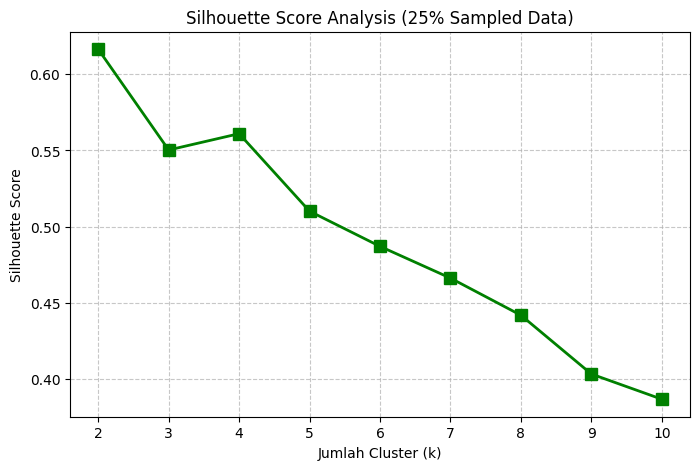

In [29]:
# Sampling 25% data untuk evaluasi
df_sampled_train, _ = train_test_split(df_encoded, test_size=0.75, random_state=0)

# List untuk menyimpan nilai Silhouette Score
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    cluster_labels = kmeans.fit_predict(df_sampled_train[numerical_features])

    # Hitung Silhouette Score
    score = silhouette_score(df_sampled_train[numerical_features], cluster_labels)
    silhouette_scores.append(score)

    # Cetak nilai Silhouette Score untuk setiap cluster
    print(f"Silhouette Score untuk k={k}: {score:.4f}")

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='-', color='g', linewidth=2, markersize=8)
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis (25% Sampled Data)')
plt.xticks(K_range)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


##### *Note:*
- Didapatkan nilai Silhouette Score:
    - Silhouette Score untuk k=2: 0.6165
    - Silhouette Score untuk k=3: 0.5503
    - Silhouette Score untuk k=4: 0.5610
    - Silhouette Score untuk k=5: 0.5100
    - Silhouette Score untuk k=6: 0.4869
    - Silhouette Score untuk k=7: 0.4661
    - Silhouette Score untuk k=8: 0.4314
    - Silhouette Score untuk k=9: 0.4031
    - Silhouette Score untuk k=10: 0.3829
- Maka digunakan K = 2

#### *3. Latih Model Dengan K=2*

In [30]:
# Inisialisasi model KMeans dengan jumlah cluster = 2
kmeans = KMeans(n_clusters=2, random_state=42)

df_final = df_encoded.select_dtypes(include=['int64', 'float64'])

# Latih model dengan K=2
kmeans.fit(df_final)
labels = kmeans.labels_

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [43]:
#Membuat df copy dengan mendrop column odometer
df_selected = df_encoded.drop(columns=["odometer", "sale_is_weekend", "sale_dayofweek", "sale_hour", "sale_day", "color", "interior"])

In [44]:
from sklearn.feature_selection import VarianceThreshold

# Gunakan VarianceThreshold untuk seleksi fitur
selector = VarianceThreshold(threshold=0.01)  # Menghapus fitur dengan varians < 0.01
X_new = selector.fit_transform(df_selected)

# Dapatkan fitur yang dipilih
selected_features = df_selected.columns[selector.get_support()]
print("Fitur terpilih:", selected_features)

Fitur terpilih: Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'seller', 'sale_year', 'sale_month'],
      dtype='object')


In [45]:
# Pilih kolom numerik dari df_selected
numerical_cols_selected = df_selected.select_dtypes(include=['number']).columns

# DataFrame untuk menyimpan hasil clustering
df_clusters_selected = pd.DataFrame(index=df_selected.index)

# K-Means Clustering untuk k=2 sampai k=10
for k in range(2, 11):
    kmeans_selected = KMeans(n_clusters=k, random_state=0, n_init=10)
    
    # Melakukan clustering dan menyimpan hasilnya
    df_clusters_selected[f'cluster_k{k}'] = kmeans_selected.fit_predict(df_selected[numerical_cols_selected])

# Menampilkan hasil clustering
print(df_clusters_selected.head())


   cluster_k2  cluster_k3  cluster_k4  cluster_k5  cluster_k6  cluster_k7  \
0           0           1           3           4           4           2   
1           0           1           3           4           4           2   
2           0           1           1           2           1           3   
3           1           0           0           3           0           6   
4           0           1           1           2           1           3   

   cluster_k8  cluster_k9  cluster_k10  
0           2           0            7  
1           2           0            7  
2           6           3            2  
3           4           7            3  
4           6           3            2  


[1480020576419.6191]
[1480020576419.6191, 779304766962.964]
[1480020576419.6191, 779304766962.964, 387140916687.9814]
[1480020576419.6191, 779304766962.964, 387140916687.9814, 291310077946.19244]
[1480020576419.6191, 779304766962.964, 387140916687.9814, 291310077946.19244, 231991583165.71042]
[1480020576419.6191, 779304766962.964, 387140916687.9814, 291310077946.19244, 231991583165.71042, 182000819184.28708]
[1480020576419.6191, 779304766962.964, 387140916687.9814, 291310077946.19244, 231991583165.71042, 182000819184.28708, 165569627035.27753]
[1480020576419.6191, 779304766962.964, 387140916687.9814, 291310077946.19244, 231991583165.71042, 182000819184.28708, 165569627035.27753, 147398059303.7552]
[1480020576419.6191, 779304766962.964, 387140916687.9814, 291310077946.19244, 231991583165.71042, 182000819184.28708, 165569627035.27753, 147398059303.7552, 134827410051.68866]


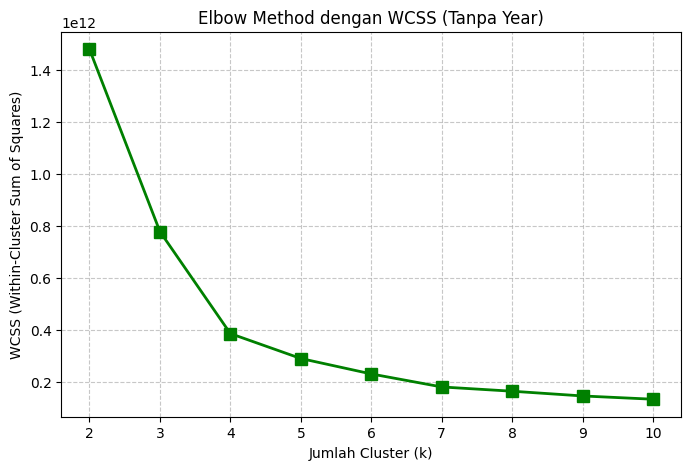

In [ ]:
# List untuk menyimpan nilai WCSS
wcss_selected = []

# Pilih jumlah cluster dari k=2 sampai k=10
K_range = range(2, 11)

for k in K_range:
    kmeans_selected = KMeans(n_clusters=k, random_state=0, n_init=10)
    
    # Melatih model K-Means
    kmeans_selected.fit(df_selected[numerical_cols_selected])
    
    # Simpan nilai WCSS untuk tiap k
    wcss_selected.append(kmeans_selected.inertia_)

    print(wcss_selected)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss_selected, marker='s', linestyle='-', color='g', linewidth=2, markersize=8)
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method dengan WCSS (Tanpa Year)')
plt.xticks(K_range)  # Pastikan label x-axis jelas
plt.grid(True, linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()


Silhouette Score untuk k=2: 0.6165
Silhouette Score untuk k=3: 0.5503
Silhouette Score untuk k=4: 0.5610
Silhouette Score untuk k=5: 0.5100
Silhouette Score untuk k=6: 0.4870
Silhouette Score untuk k=7: 0.4660
Silhouette Score untuk k=8: 0.4271
Silhouette Score untuk k=9: 0.4031
Silhouette Score untuk k=10: 0.3833


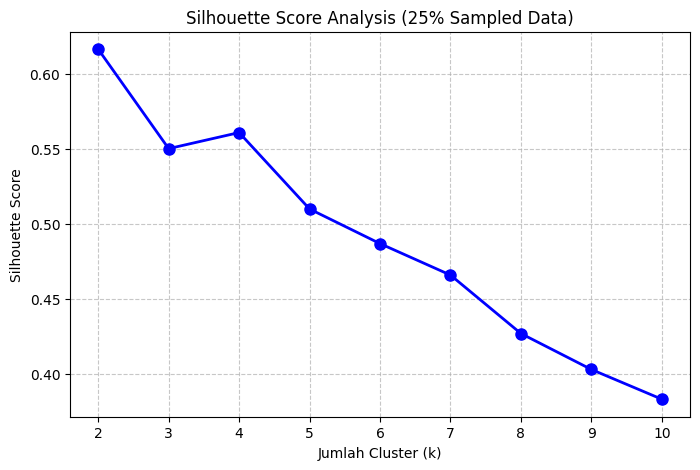

In [ ]:
# Sampling 25% data untuk evaluasi menggunakan train_test_split
df_sampled_selected, _ = train_test_split(df_selected, test_size=0.75, random_state=0)  # Ambil 25% data



# List untuk menyimpan nilai Silhouette Score
silhouette_scores_selected = []

# Gunakan model yang sudah dilatih
for k in K_range:
    
    kmeans_selected = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans_selected.fit(df_selected[numerical_cols_selected])  # Model 

    cluster_labels = kmeans_selected.predict(df_sampled_selected[numerical_cols_selected])

    # Hitung Silhouette Score
    score_selected = silhouette_score(df_sampled_selected[numerical_cols_selected], cluster_labels)
    silhouette_scores_selected.append(score_selected)

    # Cetak nilai Silhouette Score untuk setiap cluster
    print(f"Silhouette Score untuk k={k}: {score_selected:.4f}")

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores_selected, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis (25% Sampled Data)')
plt.xticks(K_range)
plt.grid(True, linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()


#### *Note:*
- Karena nilai tidak meningkat signifikan maka kita akan menggunakan df sebelumnya sebelum penghapussan column odometer dan colum lainnya.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

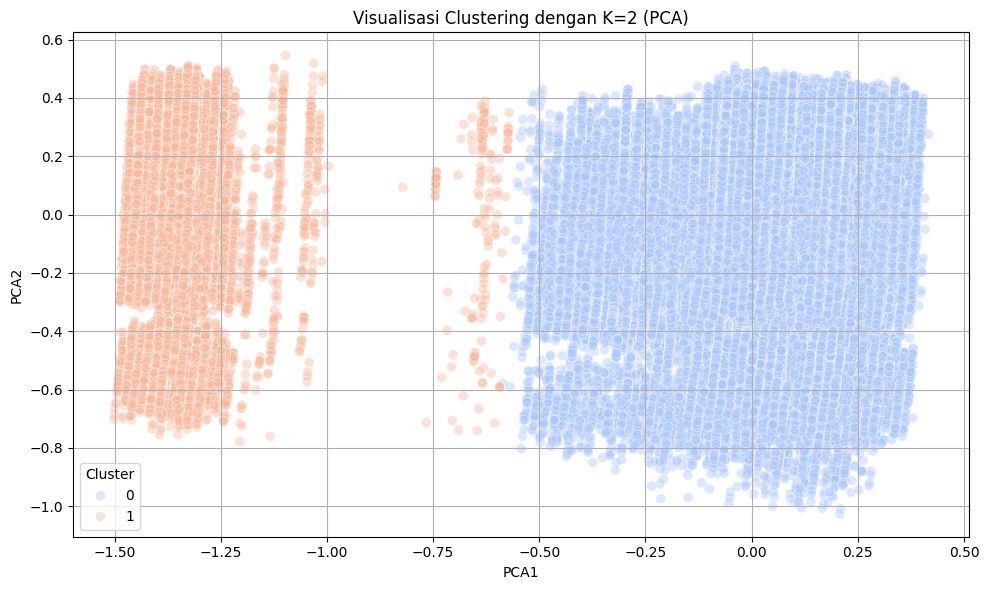

In [46]:
# Reduksi ke 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(df_final)

# Tambahkan hasil clustering ke DataFrame
df_vis = pd.DataFrame(reduced, columns=['PCA1', 'PCA2'])
df_vis['Cluster'] = labels

# Plot dengan seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_vis, 
    x='PCA1', 
    y='PCA2', 
    hue='Cluster', 
    palette='coolwarm', 
    alpha=0.4, 
    s=50,
    edgecolor='white'
)
plt.title('Visualisasi Clustering dengan K=2 (PCA)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [47]:
# Simpan hasil label cluster ke dalam DataFrame
df_encoded['Cluster'] = labels

In [48]:
df_encoded.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,vehiclevalue,sale_year,sale_month,sale_day,sale_dayofweek,sale_hour,sale_is_weekend,Cluster
0,1.00,24,637,818,35,0,2,0.083333,0.016638,17,1,5943,0.114705,0.0,1.0,0.500000,0.166667,0.173913,0.0,1
1,1.00,24,637,818,35,0,2,0.083333,0.009392,17,0,5943,0.115527,0.0,1.0,0.500000,0.166667,0.173913,0.0,1
2,0.96,3,8,253,36,0,2,0.916667,0.001330,7,1,4090,0.169248,1.0,0.0,0.433333,0.333333,0.869565,0.0,0
3,1.00,51,575,1212,36,0,2,0.833333,0.014281,17,1,11541,0.151021,1.0,0.0,0.900000,0.333333,0.869565,0.0,0
4,0.96,3,33,335,36,0,2,0.875000,0.002640,7,1,4090,0.364122,0.0,1.0,0.566667,0.500000,0.173913,0.0,1


In [49]:
# Loop untuk melakukan inverse transform pada setiap kolom kategorikal
for col in categorical_cols:
    df_encoded[col] = label_encoders[col].inverse_transform(df_encoded[col])

In [50]:
# Memasukkan kembali data yang telah di-inverse ke dataset asli
for col in categorical_cols:
    df[col] = df_encoded[col]

In [51]:
# Memastikan kolom cluster tetap ada di df asli
df['Cluster'] = df_encoded['Cluster']

In [52]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,vehiclevalue,sale_year,sale_month,sale_day,sale_dayofweek,sale_hour,sale_is_weekend,Cluster
0,1.00,Kia,Sorento,LX,SUV,automatic,ca,0.083333,0.016638,white,black,kia motors america inc,0.114705,0.0,1.0,0.500000,0.166667,0.173913,0.0,1
1,1.00,Kia,Sorento,LX,SUV,automatic,ca,0.083333,0.009392,white,beige,kia motors america inc,0.115527,0.0,1.0,0.500000,0.166667,0.173913,0.0,1
2,0.96,BMW,3 Series,328i SULEV,Sedan,automatic,ca,0.916667,0.001330,gray,black,financial services remarketing (lease),0.169248,1.0,0.0,0.433333,0.333333,0.869565,0.0,0
3,1.00,Volvo,S60,T5,Sedan,automatic,ca,0.833333,0.014281,white,black,volvo na rep/world omni,0.151021,1.0,0.0,0.900000,0.333333,0.869565,0.0,0
4,0.96,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,0.875000,0.002640,gray,black,financial services remarketing (lease),0.364122,0.0,1.0,0.566667,0.500000,0.173913,0.0,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [53]:
df[scaled_cols] = scaler.inverse_transform(df[scaled_cols])

In [54]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,vehiclevalue,sale_year,sale_month,sale_day,sale_dayofweek,sale_hour,sale_is_weekend,Cluster
0,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,21000.0,2014.0,12.0,16.0,1.0,4.0,0.0,1
1,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,21150.0,2014.0,12.0,16.0,1.0,4.0,0.0,1
2,2014.0,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),30950.0,2015.0,1.0,14.0,2.0,20.0,0.0,0
3,2015.0,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27625.0,2015.0,1.0,28.0,2.0,20.0,0.0,0
4,2014.0,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66500.0,2014.0,12.0,18.0,3.0,4.0,0.0,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

#### *1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia*

In [61]:
# Lihat ringkasan statistik per cluster
cluster_summary = df.groupby('Cluster').agg({
    'year': 'mean',
    'vehiclevalue': ['mean', 'min', 'max'],
    'odometer': 'mean',
    'condition': 'mean',
    'sale_hour': 'mean',
    'sale_year': 'mean',
    'sale_month': 'mean',
    'sale_day': 'mean',
    'sale_dayofweek':'mean',
    'sale_hour':'mean',
    'sale_is_weekend': 'mean'
})

print(cluster_summary)

                year  vehiclevalue                       odometer  condition  \
                mean          mean    min       max          mean       mean   
Cluster                                                                        
0        2010.260501  13843.117596   75.0  182500.0  66296.839083  30.842445   
1        2009.624609  12824.426162  162.5  156000.0  71496.008972  29.965827   

         sale_hour    sale_year sale_month   sale_day sale_dayofweek  \
              mean         mean       mean       mean           mean   
Cluster                                                                
0        17.297602  2014.999986   2.916573  13.752968       1.334914   
1         2.986244  2014.000000  11.945301  23.464671       1.795748   

        sale_is_weekend  
                   mean  
Cluster                  
0              0.024328  
1              0.001550  


In [60]:
categorical_colums = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']

# Menampilkan modus setiap kolom kategorikal untuk setiap cluster
for col in categorical_colums:
    print(f"Modus untuk kolom '{col}' per cluster:")
    print(df.groupby('Cluster')[col].agg(lambda x: x.mode().iloc[0]))  # ambil nilai modus pertama kalau ada lebih dari satu
    print("\n")

Modus untuk kolom 'make' per cluster:
Cluster
0    Ford
1    Ford
Name: make, dtype: object


Modus untuk kolom 'model' per cluster:
Cluster
0    Altima
1    Altima
Name: model, dtype: object


Modus untuk kolom 'trim' per cluster:
Cluster
0    Base
1    Base
Name: trim, dtype: object


Modus untuk kolom 'body' per cluster:
Cluster
0    Sedan
1    Sedan
Name: body, dtype: object


Modus untuk kolom 'transmission' per cluster:
Cluster
0    automatic
1    automatic
Name: transmission, dtype: object


Modus untuk kolom 'state' per cluster:
Cluster
0    fl
1    ca
Name: state, dtype: object


Modus untuk kolom 'color' per cluster:
Cluster
0    black
1    black
Name: color, dtype: object


Modus untuk kolom 'interior' per cluster:
Cluster
0    black
1    black
Name: interior, dtype: object


Modus untuk kolom 'seller' per cluster:
Cluster
0    ford motor credit company llc
1               santander consumer
Name: seller, dtype: object




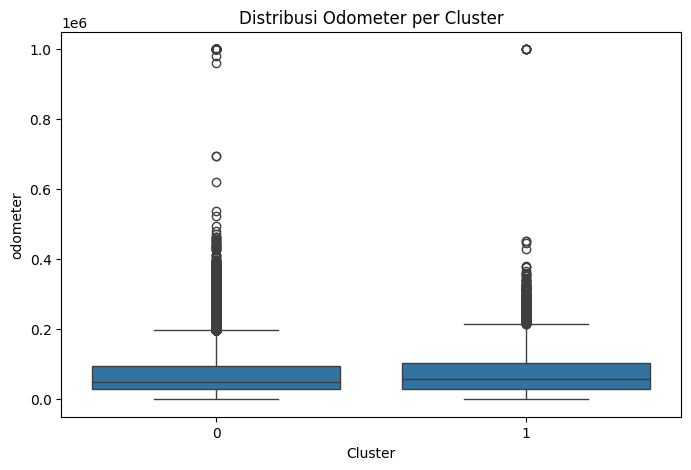

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cluster', y='odometer')
plt.title('Distribusi Odometer per Cluster')
plt.show()

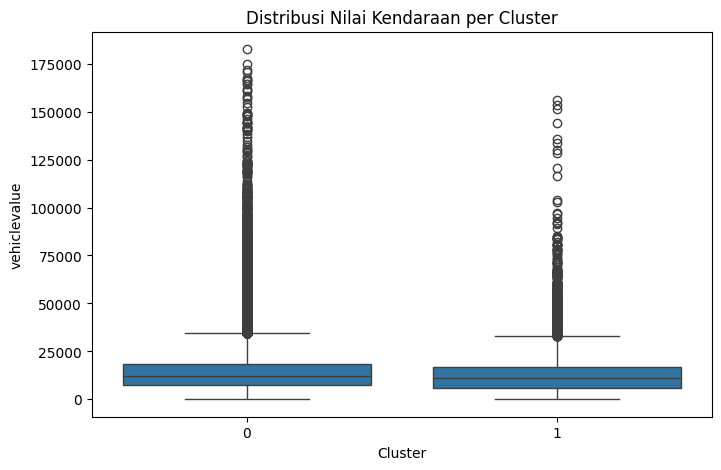

In [57]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cluster', y='vehiclevalue')
plt.title('Distribusi Nilai Kendaraan per Cluster')
plt.show()

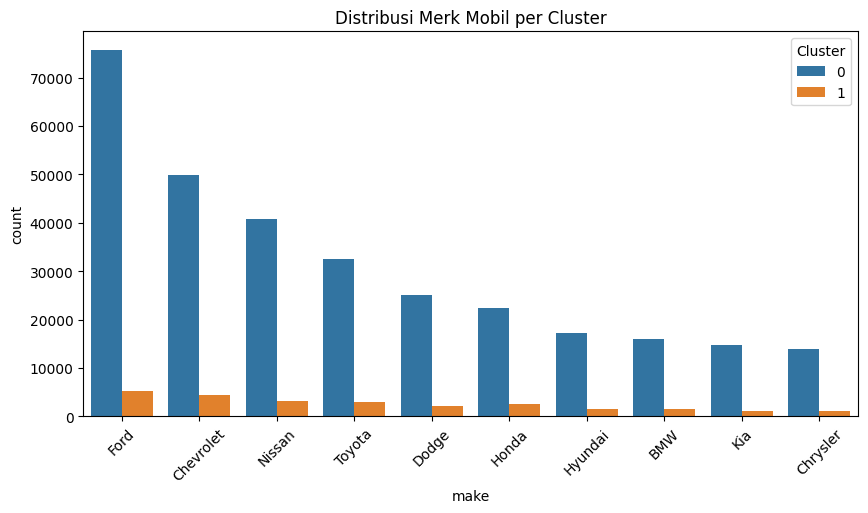

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='make', hue='Cluster', order=df['make'].value_counts().index[:10])
plt.title('Distribusi Merk Mobil per Cluster')
plt.xticks(rotation=45)
plt.show()

#### *2. Interpretasi*

- a. Cluster 0
    - Rata-rata Tahun Kendaraan: 2010
    - Rata-rata Odometer (Jarak Tempuh): 66.296 km
    - Rata-rata Nilai Kendaraan: $13.843
    - Rata-rata Kondisi Kendaraan: 30.84
    - Distribusi Nilai Kendaraan: Median harga relatif tinggi dengan banyak outlier di kisaran harga tinggi (hingga $182.500)
    - Distribusi Odometer: Lebih bervariasi, terdapat outlier kendaraan dengan jarak tempuh hingga 1 juta km
    - Distribusi Merek: Didominasi merek-merek mainstream seperti Ford, Chevrolet, Nissan, Toyota, dan lainnya
    - Modus Merek/Model/Trim/Body:
        - Merek: Ford
        - Model: Altima
        - Trim: Base
        - Body: Sedan
    - Rata-rata Jam Penjualan: 17.29 (sore hari)
    - Rata-rata Bulan Penjualan: Februari–Maret
    - Rata-rata Hari Penjualan: Sekitar hari kerja, bukan akhir pekan (hanya 2.4% pada akhir pekan)
    - Kesimpulan: Cluster ini merepresentasikan kendaraan-kendaraan massal, umum di pasar, dengan kondisi relatif baik dan jarak tempuh sedang hingga tinggi. Nilai kendaraan cukup beragam, termasuk beberapa kendaraan bernilai sangat tinggi. Segmentasi ini cocok untuk pasar luas, seperti pembeli mobil bekas skala besar, keluarga, atau fleet business. Strategi penjualan yang sesuai meliputi program diskon volume, trade-in, atau lelang kendaraan.
- b. Cluster 1
    - Rata-rata Tahun Kendaraan: 2009
    - Rata-rata Odometer (Jarak Tempuh): 71.496 km
    - Rata-rata Nilai Kendaraan: $12.824
    - Rata-rata Kondisi Kendaraan: 29.96
    - Distribusi Nilai Kendaraan: Lebih rendah dari Cluster 0, namun tetap memiliki outlier harga tinggi (hingga $156.000)
    - Distribusi Odometer: Relatif lebih stabil dibanding Cluster 0, dengan penyebaran outlier yang lebih sedikit
    - Distribusi Merek: Tetap didominasi Ford, namun total unit jauh lebih sedikit dibanding Cluster 0
    - Modus Merek/Model/Trim/Body:
        - Merek: Ford
        - Model: Altima
        - Trim: Base
        - Body: Sedan
    - Rata-rata Jam Penjualan: 2.98 (dini hari/pagi buta)
    - Rata-rata Bulan Penjualan: November–Desember
    - Rata-rata Hari Penjualan: Mayoritas hari kerja (hanya 0.15% pada akhir pekan)
    - Kesimpulan: Cluster ini menunjukkan karakteristik kendaraan dengan harga dan kondisi sedikit lebih rendah, serta tahun yang sedikit lebih lama. Meskipun pemakaian (odometer) lebih tinggi, penyebarannya tidak seekstrem Cluster 0. Cocok untuk segmen dengan bujet terbatas atau penjualan kendaraan dalam kondisi seadanya. Strategi pemasaran dapat mencakup promosi akhir tahun, diskon likuidasi, atau pasar ekspor.



# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [62]:
df.to_csv('hasil_clustering.csv', index=False)
